# **Experiment 5.2:** Sequence Text Prediction using LSTM

**Objective:**
To generate the next character (or word) in a sequence using an LSTM model trained on a text dataset.

**Dataset :Pride and Prejudice – Jane Austen (Project Gutenberg)**


Step 1: Import Required Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


Step 2: Load and Preprocess the Text Data

In [1]:
# Load text file
with open("pride_prejudice.txt", 'r', encoding='utf-8') as file:
    text = file.read().lower()

# Display part of the text
print(text[:500])


the project gutenberg ebook of pride and prejudice
    
this ebook is for the use of anyone anywhere in the united states and
most other parts of the world at no cost and with almost no restrictions
whatsoever. you may copy it, give it away or re-use it under the terms
of the project gutenberg license included with this ebook or online
at www.gutenberg.org. if you are not located in the united states,
you will have to check the laws of the country where you are located
before using this ebook.




Step 3: Create Character-to-Index Mappings

In [2]:
chars = sorted(list(set(text)))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}
vocab_size = len(chars)

print("Total Characters:", len(text))
print("Unique Characters:", vocab_size)


Total Characters: 748124
Unique Characters: 72


 Step 4: Prepare Sequences

In [6]:
import numpy as np # Import the numpy library and give it the alias 'np'
seq_length = 100
X_data = []
y_data = []

for i in range(0, len(text) - seq_length):
    seq = text[i:i + seq_length]
    label = text[i + seq_length]
    X_data.append([char_to_idx[char] for char in seq])
    y_data.append(char_to_idx[label])

# Convert to numpy and one-hot encode output
X = np.array(X_data)
y = to_categorical(y_data, num_classes=vocab_size)

Step 5: Build the LSTM Model

In [7]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=seq_length))
model.add(LSTM(256, return_sequences=False))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Step 6: Train the Model

In [11]:
history = model.fit(X, y, epochs=2, batch_size=128, validation_split=0.1)


Epoch 1/2
5260/5260 ━━━━━━━━━━━━━━━━━━━━ 4114s 782ms/step - loss: 1.6799 - val_loss: 1.6141
Epoch 2/2
5260/5260 ━━━━━━━━━━━━━━━━━━━━ 4230s 795ms/step - loss: 1.3844 - val_loss: 1.5293


Step 7: Plot Training Accuracy and Loss

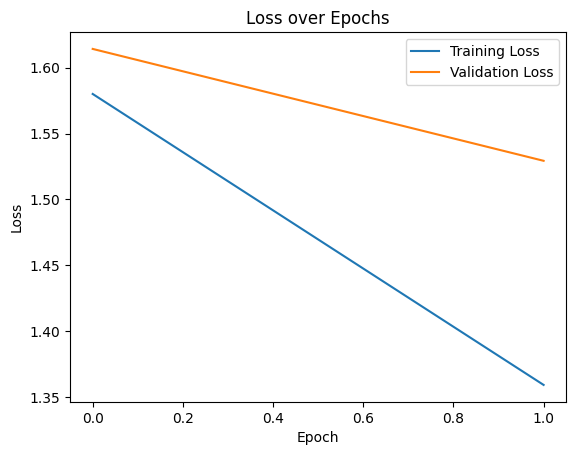

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


Step 8: Text Generation Function

In [13]:
def generate_text(seed_text, gen_length=200):
    input_seq = [char_to_idx[char] for char in seed_text.lower()[-seq_length:]]
    for _ in range(gen_length):
        input_padded = np.array(input_seq[-seq_length:]).reshape(1, -1)
        predicted_probs = model.predict(input_padded, verbose=0)[0]
        predicted_char_index = np.random.choice(range(vocab_size), p=predicted_probs)
        predicted_char = idx_to_char[predicted_char_index]
        seed_text += predicted_char
        input_seq.append(predicted_char_index)
    return seed_text


Step 9: Try Generating Text!



In [14]:
seed = "it is a truth universally acknowledged"
generated = generate_text(seed, gen_length=300)
print("\n--- Generated Text ---\n")
print(generated)



--- Generated Text ---

it is a truth universally acknowledged to merything, in him tonst sup1iss. elongem. mr. i believe scaritaly talk at least
miss bingley’s lucas; but you are longur that while i ceoded represently as you have leave much as you knowled”

“it was mattry are not ever why well i hoped her viesing to--it was folded appear, with an air by tiler


# **Declaration**

I, Shruti Deokar, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/shrutideokar/deeplearning

Signature: Shruti Jitendra Deokar